#Credit Card Fraud

Every year, hundreds of millions of dollars is lost to credit card fraud. The ability to detect credit card fraud is often difficult, arduous, and an expensive predicament. Yet, ever since the innovation of Machine Learning, it has lessened, becoming easier to detect. And so, the question stands:

 - Given the use of data across thousands of transactions, are we able to predict credit card fraud with high accuracy and relatively high precision?
  - In answering this question, we will employ two methods, Logistic Regression and Support Vector Machines to measure the accuracy and precision of each model in predicting whether a transaction is fraudulent or non-fraudulent




In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, f1_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression


First, we need to import our required libraries and packages in order to properly analyze our dataset and understand what we are working with. In the following order, what we are using is as follows: 
- Pandas is a python library used explicitly for data visualization and analysis
- Matplotlib is a python library used for data visualization and graphing
- Seaborn is a is a python library used for making statistical graphics
- Sklearn is a machine learning library for which we will use to analyze our data. From it, we can use algorithms such as 
  - Support Vector Machines (or SVMs)
  - Splitting our data into training and testing sections 
  - Logistic Regression
  - Calculating accuracy and other metrics of grading Machine Learning Algorithms

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")

The above url is where we receive our data from. Originally found on Kaggle, it provides over 285,000 credit card transactions from a real world example, of which a portion is classified as fraud. 

###*Data Visualization*


In [ ]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Looking into our data, we can see that our dataset is broken into 31 classes, labeled as time, amount, class, and V1 through V28. Time is broken as the time period elapsed between each transaction, and offers little value in trying to determine fraudulent transactions. Other notable important features we can derive from peaking into the first 5 rows of our data are:
 - Amount has relatively large numerical values compared to V1 - V28, and thus needs to be changed. 
 - Class has two values, either 0 or 1, and represents our fraudulent transaction, either as a 0 (no) or a 1 (yes)
 - V1 - V28 is odd in the sense that they are hard to understand and interpret relative to credit card fraud. Looking into our dataset, we see that they were preprocessed points of information grouped by a Machine Learning Algorithm called P.C.A. for confidentiality reasons.

In [ ]:
df.shape

(284807, 31)

Here we can reaffirm the dimensions of our dataset. It is 284,807 rows, each row with 31 columns representing our features (Amount, Class, Time, V1 - V28)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Using the isnull function, we see that none of our data's columns have empty features, and so we do not need to account for discrepencies in data. 

In [6]:
print(np.sum(df['Class']==1))

fraud_cases = np.sum(df['Class']==1)

492


Now, we want to get a grasp on the amount of fraudulent cases in our dataset. Recalling that our 'Class' feature split fraud and non fraud transactions into one's and zero's, we simply find out the total amount of "1"s in our 'Class' feature.

In [7]:
print(np.sum(df['Class']==0))

non_fraud_cases = np.sum(df['Class']==0)


284315


Similarly, we want to get a grasp on the amount of legitimate, non-fraudulent cases in our dataset. Recalling that our 'Class' feature split fraud and non fraud transactions into one's and zero's, we simply find out the total amount of "0"s in our 'Class' feature.

In [11]:
print((fraud_cases/non_fraud_cases)*100)

0.17304750013189596


Calculating the percentage between fraudulent and non-fraudulent cases, we can see a large disparity. In fact, only 0.17% of our cases are fraudulent, which is good for our consumer's in the real world, but difficult for our Machine Learning algorithms. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions of Fraud and Non-Fraud cases')

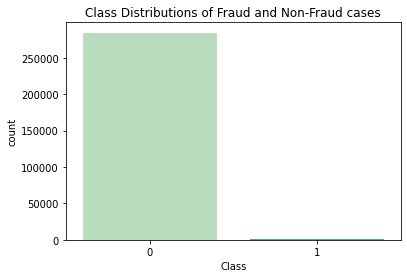

In [ ]:
sns.countplot('Class', data=df, palette="GnBu")
plt.title('Class Distributions of Fraud and Non-Fraud cases')

Visualizing this disparity, we can see the large difference in cases between legitimate, non-fraudulent transactions and fraudulent transactions

**Now, what features can give us clues about the legitimacy of a transaction?**

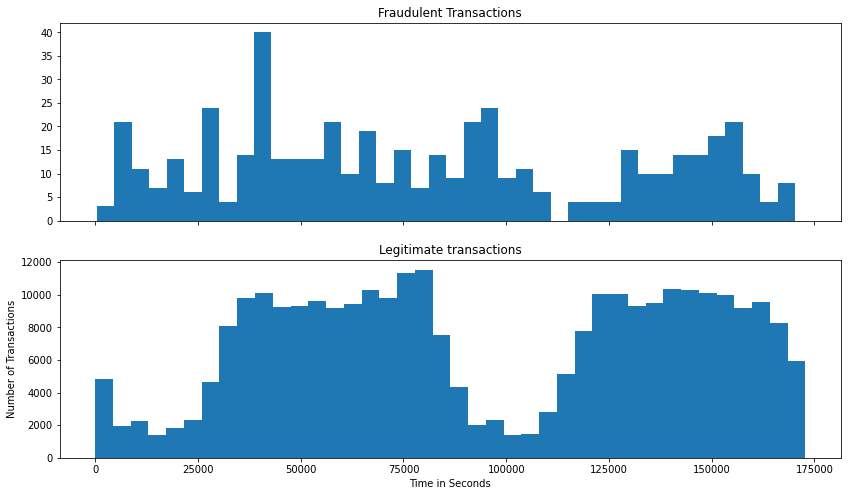

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 8))

bins = 40

ax1.hist(df.Time[df.Class == 1], bins=bins)
ax1.set_title('Fraudulent Transactions')

ax2.hist(df.Time[df.Class == 0], bins=bins)
ax2.set_title('Legitimate transactions')

plt.xlabel('Time in Seconds')
plt.ylabel('Number of Transactions')
plt.show()

Looking at this data, we can see that 'Time' looks pretty similar across both fraudulent and non-fraudulent transactions. In essence, there is nothing discerning about time in determing the type of transaction, which is our goal, and so reinforces the idea that we can do away with this feature in optimizing our algorithm. 

However, what about amounts?

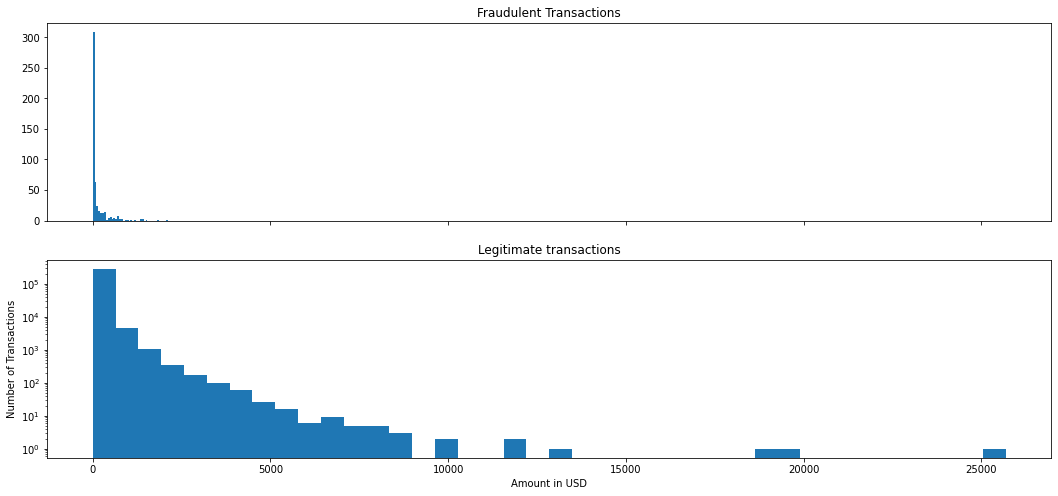

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 8))

bins = 40

ax1.hist(df.Amount[df.Class == 1], bins=bins)
ax1.set_title('Fraudulent Transactions')

ax2.hist(df.Amount[df.Class == 0], bins=bins)
ax2.set_title('Legitimate transactions')

plt.xlabel('Amount in USD')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Wow, There seems to be a large difference in the dollar amounts between Fraudulent and Legitimate transactions, primarily in that fraudulent transactions are for small amounts. Let's investigate further. 

In [15]:
print("Fraudulent Transactions")
print(df.Amount[df.Class==1].describe())
print()
print("Legitimate Transactions")
print(df.Amount[df.Class==0].describe())

Fraudulent Transactions
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Legitimate Transactions
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


As we can see from above, we can confirm to a relative degree that there is a significant difference in amounts betwee legit and non-legit credit card transactions.  The max amount is the most signifant differences, with illegitamte credit card transactions being less than 2,125 USD, and legitimate transactions extending beyond 25,690 USD. 

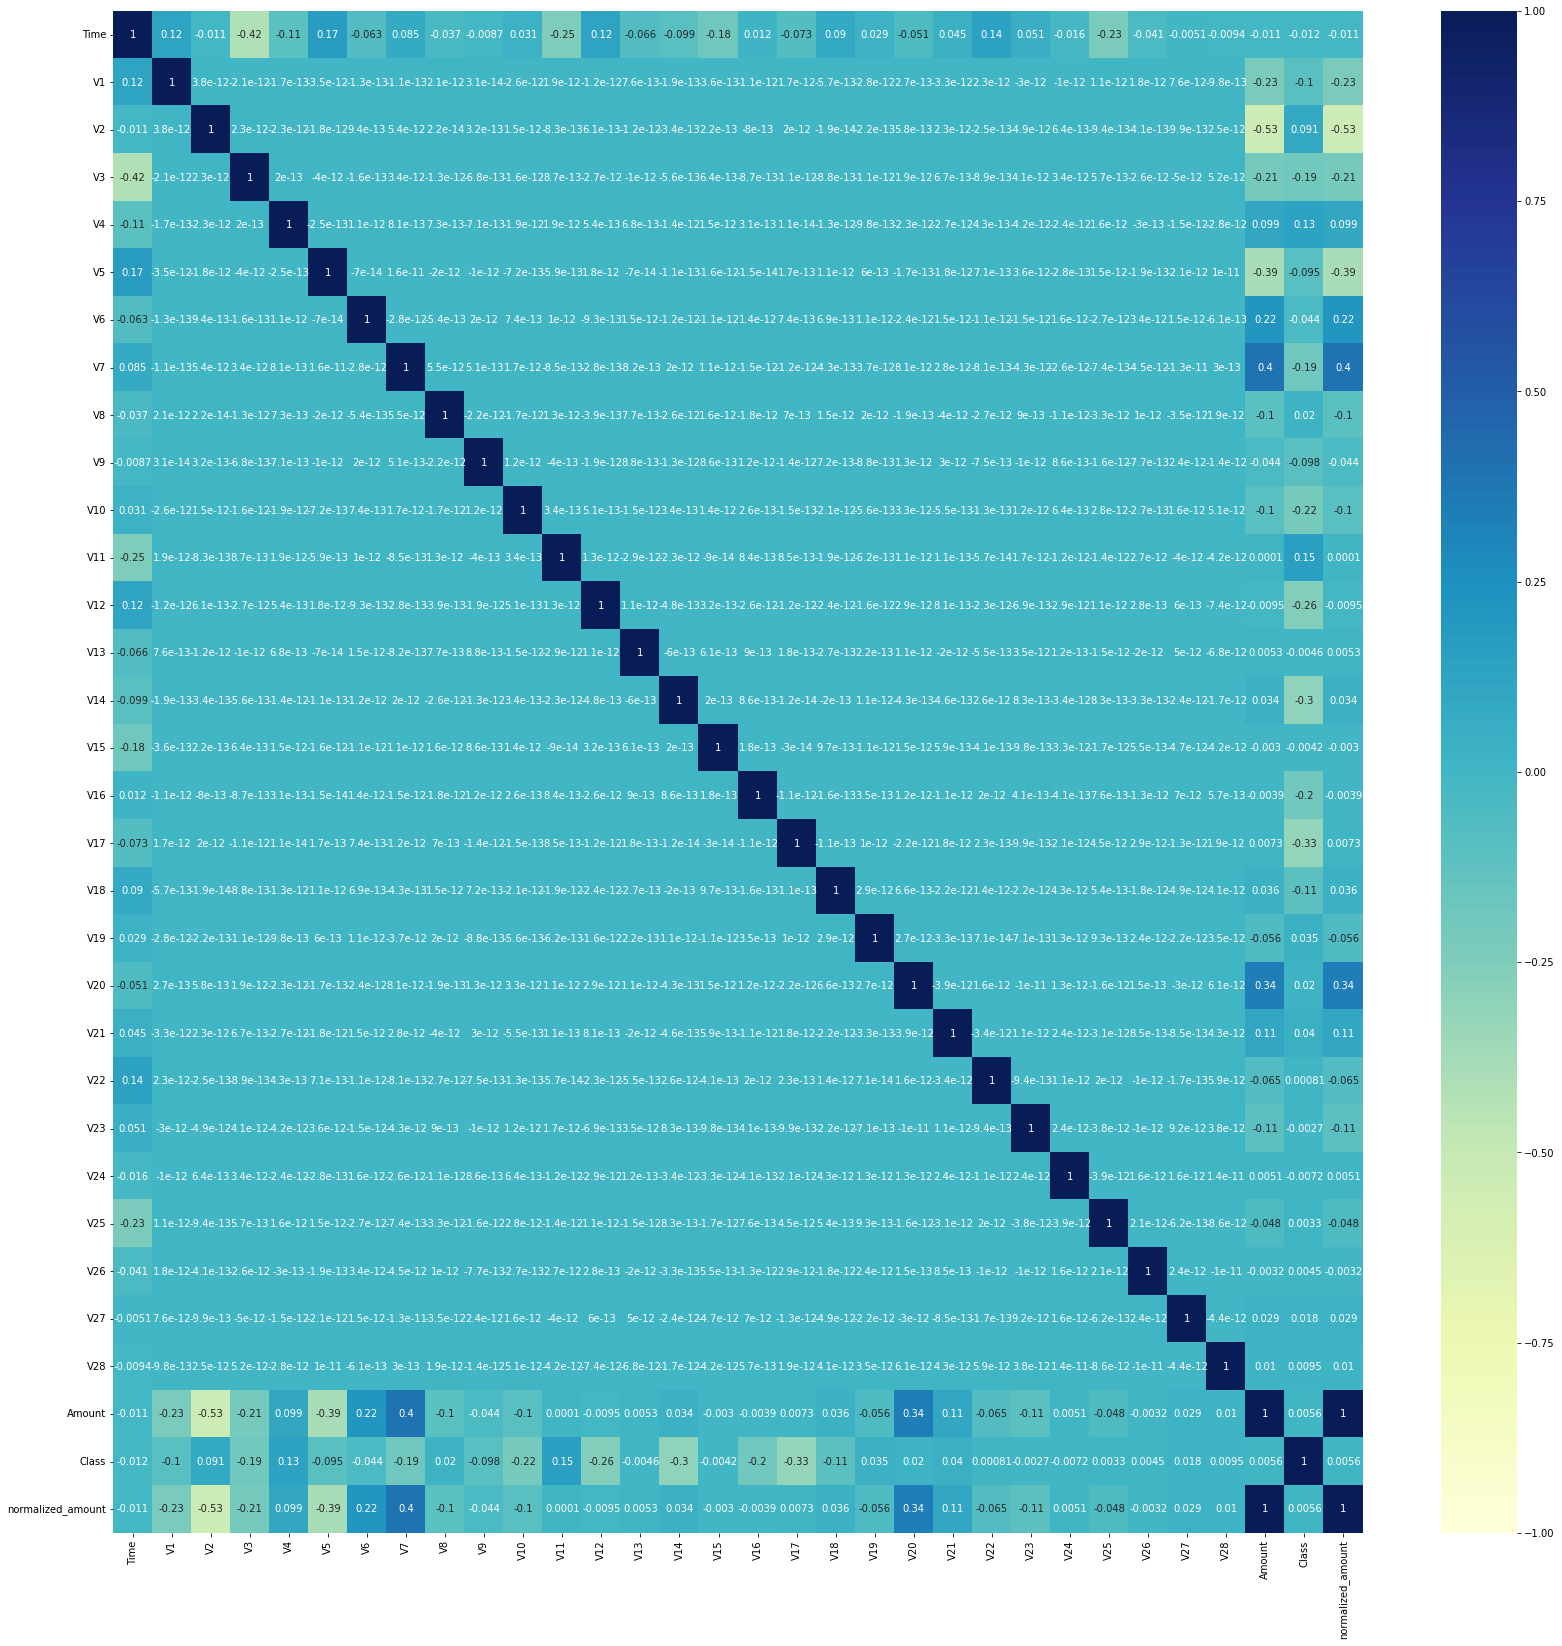

In [ ]:
corr = df.corr()
plt.figure(figsize=(28, 28))
sns.heatmap(corr, cmap='YlGnBu', annot=True, vmin=-1, vmax=1)
plt.show()


Before continuing onto manipulating our data for our Machine Learning to process, we want to create a correlation map to see whether any feature is highly correlated to another feature. Given that this dataset was previously exposed to a P.C.A. process, we should not expect any highly correlated features.

As expected, there are no highly correlated features, which would be represented as an extreme yellow or deep blue/purple box. The only features highly correlated are those compared against themselves (as expected). 

##*Scaling and Normalization*

In this section of our notebook, we will scale the Time and Amount column so that they match other columns. This is to prevent an influence of these features on our overall prediction simply because they have large values. It is important to note: **just because these features have large numbers, doesn't mean that they should have large influences**

Furthermore, we will create a subsample of our dataframe with a 50/50 ratio of our fraudulent and non-fraudulent transactions. This ensures that when we test our Machine Learning algorithm, we will have a balanced dataset


**But who cares about an imbalanced dataset?**
An imbalanced dataset can cause us many problems, primarily of which are as follow:
> *Overfitting*, or when our model assumes that in most cases there are no frauds, and gives us false results. When we test our model, we want it to be accurate in determining when fraud actions occur. Otherwise, it will allow fraudulent cases to pass by without notice, costing customers money!

> *Poor Correlations*, or when we cannt see the true relationships between our dataset features. Since it is already difficult given that this dataset was previously worked on with P.C.A, this will be especially useful to see that the relationships betwee V1-V28, Amount, Time, and Class are properly formed.

Since there are 492 fraudulent transactions, we will aim to have 492 **non-fraudulent transactions to create a new subsample of under 1000, nearly 50/50 equal dataset**

###Standard Scaler and Dropping test

In [22]:
from sklearn.preprocessing import StandardScaler

df['normalized_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['normalized_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount,normalized_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249,1.641974


Now we have better representative values for our 'Time' and 'Amount' features, ensuring that they have smaller values in a numerical sense, but the same relationships in each column. This was achieved with 'Standard Scaler', a built in function that standardizes a given set of values

Now that every feature is properly preprocessed, we can continue and balance our dataset according to our aforementioned parameters

In [23]:

df = df.sample(frac=1)

#Since fraudulent data are represented by "1" values in our Class feature, we set our new fraudulent dataset to all values of 1
fraud_data_df = df.loc[df['Class'] ==1]
non_fraud_data_df = df.loc[df['Class'] ==0][:492]

#We now set a dataset of "0" values from our Class feature with a total of 492 samples

#Let's now add our two datasets together and shuffle them
fifty_fifty_dataset = pd.concat([fraud_data_df, non_fraud_data_df])
normalized_df = fifty_fifty_dataset.sample(frac=1, random_state=42)



In [24]:
normalized_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalized_amount,normalized_time
203116,134659.0,2.073987,0.139006,-1.695027,0.427727,0.372098,-0.907665,0.163872,-0.220570,0.539567,-0.368603,-0.592429,-0.010240,-0.256621,-0.779920,0.237307,0.321594,0.503309,-0.279819,0.042979,-0.178775,-0.366572,-0.964057,0.348296,0.559415,-0.272834,0.170773,-0.064568,-0.030933,0.99,0,-0.349271,0.839056
53591,46057.0,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,2.962599,-3.956045,-1.539232,-4.634631,-0.248403,-2.058551,-5.635494,-0.775271,-0.239310,0.253464,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1,-0.349231,-1.026718
150720,93970.0,0.165334,2.229841,-0.655246,5.053751,1.359960,0.008400,0.588735,-0.195640,-0.343971,0.678250,0.492501,-3.559974,1.922847,-1.242254,-0.041268,0.640814,2.939723,1.092714,0.656159,0.194133,-0.537050,-1.162867,0.218330,-0.774881,-0.712536,0.001830,-0.125275,0.102001,2.72,0,-0.342355,-0.017770
42473,41116.0,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,-11.298156,7.252953,-14.275092,0.188903,-14.555957,-0.338289,-12.146540,-25.162799,-9.042845,0.787579,1.384743,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,3.79,1,-0.338077,-1.130765
10630,17838.0,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,-11.786812,9.369079,-15.094163,1.256377,-11.852161,0.274430,-10.688242,-18.388811,-6.898840,2.382808,-0.623737,2.086083,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,766.36,1,2.710744,-1.620952


In [29]:
normalized_df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [30]:
normalized_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount,normalized_time
203116,2.073987,0.139006,-1.695027,0.427727,0.372098,-0.907665,0.163872,-0.220570,0.539567,-0.368603,-0.592429,-0.010240,-0.256621,-0.779920,0.237307,0.321594,0.503309,-0.279819,0.042979,-0.178775,-0.366572,-0.964057,0.348296,0.559415,-0.272834,0.170773,-0.064568,-0.030933,0,-0.349271,0.839056
53591,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,2.962599,-3.956045,-1.539232,-4.634631,-0.248403,-2.058551,-5.635494,-0.775271,-0.239310,0.253464,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1,-0.349231,-1.026718
150720,0.165334,2.229841,-0.655246,5.053751,1.359960,0.008400,0.588735,-0.195640,-0.343971,0.678250,0.492501,-3.559974,1.922847,-1.242254,-0.041268,0.640814,2.939723,1.092714,0.656159,0.194133,-0.537050,-1.162867,0.218330,-0.774881,-0.712536,0.001830,-0.125275,0.102001,0,-0.342355,-0.017770
42473,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,-11.298156,7.252953,-14.275092,0.188903,-14.555957,-0.338289,-12.146540,-25.162799,-9.042845,0.787579,1.384743,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,1,-0.338077,-1.130765
10630,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,-11.786812,9.369079,-15.094163,1.256377,-11.852161,0.274430,-10.688242,-18.388811,-6.898840,2.382808,-0.623737,2.086083,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,1,2.710744,-1.620952


In [33]:
normalized_df.shape

(984, 31)

At this point, we have our golden dataset. It is now normalized, scaled, and preprocessed according to our liking. We have our features scaled as we want and an equal distribution of fraudulent and non-fraudulent cases to avoid overfitting. And as seen from the above shape, it totals 984 instances, representing our 50/50 split in data. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions of Fraud and Non-Fraud cases')

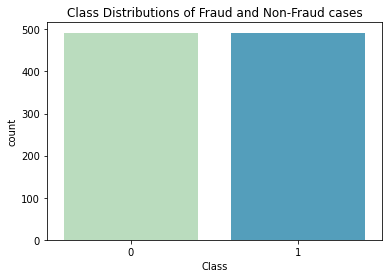

In [32]:
sns.countplot('Class', data=normalized_df, palette="GnBu")
plt.title('Class Distributions of Fraud and Non-Fraud cases')

Looking at our previous graph on this new data, it confirms as we wished - that we have our equal, properly scaled data. 

##*Applying Our Classifiers*

The time has come, we can finally apply our Machine Learning classification algorithms

In [34]:
y = normalized_df['Class']
X = normalized_df.drop(['Class'], axis=1)

print(X.shape)
print(y.shape)

(984, 30)
(984,)


We set our target feature to what we want to classify, and conversely, take it out of our dataset. In this case, it is 'Class' since we are training our model to accurately predict fraudulent and non-fraudulent cases, and 'Class' displays whether a transaction is fraudulent or non-fraudulent

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


Now, we train our data using one of our libraries imported from very early on - sklearn and its train_test_split preprocessing feature

###*Logistic Regression Classifier*

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       109
           1       0.97      0.91      0.94       137

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246


The accuracy percentage is:
0.9308943089430894

The f1 score is: 
0.9358490566037736

The recall is:
0.9051094890510949

 The precision is: 
0.96875



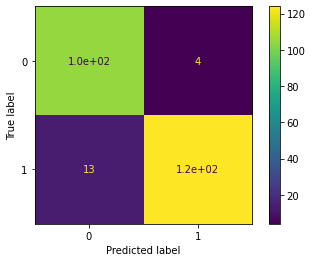

In [43]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

print(classification_report(y_test, y_predict))
print()
print("The accuracy percentage is:")
print(accuracy_score(y_test, y_predict))
print()
print("The f1 score is: ")
print(f1_score(y_test, y_predict))
print()
print("The recall is:")
print(recall_score(y_test, y_predict))
print()
print(" The precision is: ")
print(precision_score(y_test, y_predict))
print()
plot_confusion_matrix(LR, X_test, y_test)
plt.show()

**Analysis:** Our first classifier model is a simple, yet highly effective Logistic Regression. A Logistic Regression is essentially a linear equation applied to our data using complex mathematical equations, and associated influences, called weights, on each of our features. And, as seen above, it is highly effective, yielding us an accuracy of 0.93089, or 93.089%. Logistic Regression is particularly effective since it primarily a **binary classifier**, or a classifier function that works well in predicting binary data (think of our 'Class' feature generating either a 0 or a 1, but nothing else, i.e. **one of two values**

However, what about the other metrics?
- *Recall Score*
  - Recall is a metric used by Statisticians to calculate the True Positive Rate, or the ratio of fraud cases our model is correctly able to detected. A high Recall score usually means that for most true, positive cases of fraud, we have detected them. However, it can also mean that in our frenzy of detecting all positive cases of fraud, we also called regular, legitimate transactions "fraudulent". 
    > Calculated as True Positives / (True Positives + False Negatives)
- *Precision Score*
  - This metric determines the precision, or certainty, of our models predictions of fraudulent credit card transactions, and is an important metric to understand how accurate we are at making good predictions. 
    > Calculated as True Positives / (True Positives + False Positives)
- *F1 Score*
  - An F1 score is a classifier which helps us understand the relationship between Recall and Precision. Whereas the two metrics are usually a tradeoff, a high F1 score only occurs when both Precision and Recall are high. This essentially means that our model is very picky in classifying fraudulent cases, and very accurate when it does classify a specific case as fraudulent or non-fraudulent. 

What about the graph? 
This graph is a a confusion matrix, and helps visualize where errors may have been made. It is structured as follows:
  - Top Left Quadrant = True Positive Cases
    - Indicates that our model correctly classified fraudulent transactions
  - Top Right Quadrant = False Positives
    - Indicates that our model incorrectly classified fraudulent transactions
  - Bottom Left Quadrant = False Negatives
    - Indicates that our model incorrectly classified legitimate transactions
  - Bottom Right Quadrant = True Negatives
    - Indicates that our model correctly identified legitimate transactions
As you can see, our simple Logistic Regression Classifier was highly effective in determining and discerning fraudulent from non-fraudulent credit card transactions, with high Accuracy, Precision, F1, and Recall scores.


###*Support Vector Machine (SVM) Classifier* 

Our next classifier is a Support Vector Machine, or a SVM for short. This classifier is capable of performing linear and nonlinear classification, regression, and other forms of Machine Learning algorithms. It is highly useful and powerful.

In [60]:
#instantiate our SVM
#The rbf here stands for Radial basis function
svm = SVC(kernel='rbf', C=10)


In [58]:
svm.fit(X_train, y_train)

y_predict_svm = svm.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       109
           1       0.98      0.91      0.94       137

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246


The accuracy percentage is:
0.9390243902439024

The f1 score is: 
0.9429657794676807

The recall is:
0.9051094890510949

 The precision is: 
0.9841269841269841



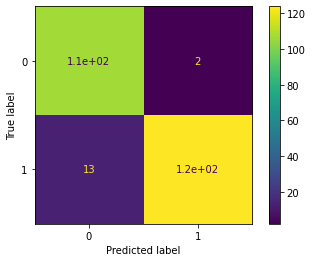

In [59]:

print(classification_report(y_test, y_predict_svm))
print()
print("The accuracy percentage is:")
print(accuracy_score(y_test, y_predict_svm))
print()
print("The f1 score is: ")
print(f1_score(y_test, y_predict_svm))
print()
print("The recall is:")
print(recall_score(y_test, y_predict_svm))
print()
print(" The precision is: ")
print(precision_score(y_test, y_predict_svm))
print()
plot_confusion_matrix(svm, X_test, y_test)
plt.show()

**Analysis**: Compared to our Linear Regression model the results are quite similar. Notably, there is an increase in accuracy to 93.9%, and our precision score increased to 0.98, which is indicated through our confusion matrix "False Positives" decreasing from 4 to 2. The recall value stayed the same, as evidenced by our "False Negatives" cases neither increasing nor decreasing, and our F1 score increasing to 0.94, demonstrating a slightly improved relationship between Recall and Precision, most likely due to the increase in our Precision score. However, can we tune our SVM to better generate results?

###*SVM with Slight Tuning*

In [74]:
svm_tune = SVC(kernel='rbf', C=25)
#rbf usually more accurate 

In [75]:
svm_tune.fit(X_train, y_train)

y_predict_svm_tune = svm_tune.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       109
           1       0.98      0.91      0.95       137

    accuracy                           0.94       246
   macro avg       0.94      0.95      0.94       246
weighted avg       0.95      0.94      0.94       246


The accuracy percentage is:
0.943089430894309

The f1 score is: 
0.9469696969696969

The recall is:
0.9124087591240876

 The precision is: 
0.984251968503937



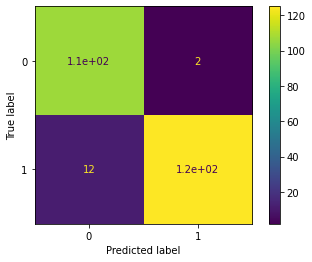

In [76]:

print(classification_report(y_test, y_predict_svm_tune))
print()
print("The accuracy percentage is:")
print(accuracy_score(y_test, y_predict_svm_tune))
print()
print("The f1 score is: ")
print(f1_score(y_test, y_predict_svm_tune))
print()
print("The recall is:")
print(recall_score(y_test, y_predict_svm_tune))
print()
print(" The precision is: ")
print(precision_score(y_test, y_predict_svm_tune))
print()
plot_confusion_matrix(svm_tune, X_test, y_test)
plt.show()


**Analysis** By manipulating the C penalty parameter, which controls the tradeoff in our decision boundary and classification, we are able to achieve a relatively similar 94.3% accuracy, but significantly an increased recall value of 0.912, indicating that we are capturing more positive cases of fraud and labeling them as such. 

Overall, given our high accuracy and precision, recall, and F1 scores, we are able to concretely state that we can predict credit card fraud with high accuracy and precision.
